In [1]:
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
from gensim.models import Word2Vec                                   #For Word2Vec

from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt

from time import time

In [23]:
dataset_path = "Reviews_cleaning.csv"
data = pd.read_csv(dataset_path)
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,TextClean
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanut peanut a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confect around centuri light pillowi citrus ge...


# WordCloud

In [3]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

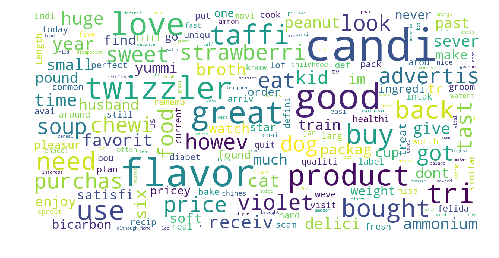

In [4]:
show_wordcloud(data["TextClean"])

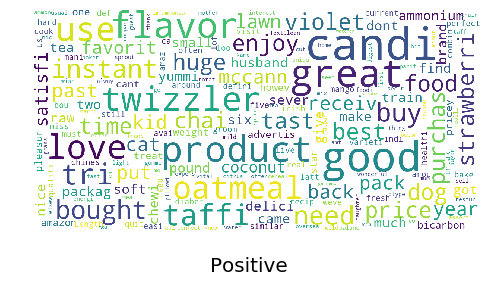

In [5]:
show_wordcloud(data[data['Score'] == 'positive']["TextClean"], title = "Positive")

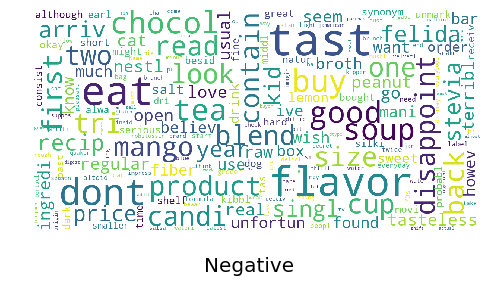

In [6]:
show_wordcloud(data[data['Score'] == 'negative']["TextClean"], title = "Negative")

# CountVectorizer

In [7]:
count_vect = CountVectorizer(max_features=5000)

In [8]:
bow_data = count_vect.fit_transform(data["TextClean"])

In [9]:
bow_data

<364173x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 11426950 stored elements in Compressed Sparse Row format>

In [10]:
bow_data.shape

(364173, 5000)

In [11]:
print(data['TextClean'][0])
print(bow_data[0])

bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better 
  (0, 305)	1
  (0, 1733)	1
  (0, 2494)	1
  (0, 502)	2
  (0, 4020)	1
  (0, 2756)	1
  (0, 3440)	1
  (0, 4202)	1
  (0, 2578)	1
  (0, 2620)	1
  (0, 3512)	1
  (0, 1977)	1
  (0, 1817)	1
  (0, 3443)	3
  (0, 1792)	1
  (0, 1381)	1
  (0, 730)	1
  (0, 4777)	1
  (0, 3889)	1
  (0, 588)	1


# Bigram

In [12]:
count_vect = CountVectorizer(ngram_range=(1,2))
bigram_data = count_vect.fit_transform(data["TextClean"])

In [13]:
print(data['TextClean'][0])
print(bigram_data[0])

bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better 
  (0, 2188101)	1
  (0, 181235)	1
  (0, 1078006)	1
  (0, 1556000)	1
  (0, 306719)	1
  (0, 2556436)	1
  (0, 1745826)	1
  (0, 2184560)	1
  (0, 2665246)	1
  (0, 1618076)	1
  (0, 1655195)	1
  (0, 2190889)	1
  (0, 2234206)	1
  (0, 1239115)	1
  (0, 1136137)	1
  (0, 2189793)	1
  (0, 1121033)	1
  (0, 850589)	1
  (0, 453923)	1
  (0, 3037358)	1
  (0, 2479978)	1
  (0, 365543)	1
  (0, 180553)	1
  (0, 1077990)	1
  (0, 1555956)	1
  (0, 304623)	2
  (0, 2556249)	1
  (0, 1744517)	1
  (0, 2183756)	1
  (0, 2664897)	1
  (0, 1609996)	1
  (0, 1653329)	1
  (0, 2232350)	1
  (0, 1234798)	1
  (0, 1134436)	1
  (0, 2187329)	3
  (0, 1117504)	1
  (0, 849323)	1
  (0, 453325)	1
  (0, 3037338)	1
  (0, 2478185)	1
  (0, 362472)	1


# TfidfVectorizer

In [14]:
tf_idf = TfidfVectorizer(max_features=5000)
tf_idf_data = tf_idf.fit_transform(data["TextClean"])

In [15]:
tf_idf_data

<364173x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 11426950 stored elements in Compressed Sparse Row format>

In [16]:
tf_idf_data.shape

(364173, 5000)

In [17]:
print(data['TextClean'][0])
print(tf_idf_data[0])

bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better 
  (0, 588)	0.14847487090123496
  (0, 3889)	0.1828540278271133
  (0, 4777)	0.34070463684939656
  (0, 730)	0.19527845787207482
  (0, 1381)	0.15954833030101745
  (0, 1792)	0.13371223415865188
  (0, 3443)	0.3129255131334196
  (0, 1817)	0.14575825667227213
  (0, 1977)	0.0973890948589811
  (0, 3512)	0.16732602399573435
  (0, 2620)	0.14407080316906193
  (0, 2578)	0.09077745516777738
  (0, 4202)	0.2880292361198805
  (0, 3440)	0.22272527456248487
  (0, 2756)	0.21050425933038805
  (0, 4020)	0.17603556147703375
  (0, 502)	0.27515625910556474
  (0, 2494)	0.35950263043360187
  (0, 1733)	0.2970947684083815
  (0, 305)	0.2454340579467747


# Word2Vec

In [18]:
start = time()

splitted = []
for row in data['TextClean']: 
    splitted.append([word for word in row.split()])     # splitting words
    
train_w2v = Word2Vec(splitted,min_count=5,size=50, workers=4)
    
latency = time() - start
print(latency)

51.515339374542236


In [19]:
start = time()

avg_data = []
for row in splitted:
    vec = np.zeros(50)
    count = 0
    for word in row:
        try:
            vec += train_w2v[word]
            count += 1
        except:
            pass
    avg_data.append(vec/count)
    
latency = time() - start
print(latency)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


122.15987300872803


In [20]:
print("Average Word2Vec shape : (%d,%d)" % (len(avg_data), len(avg_data[0])))

Average Word2Vec shape : (364173,50)


In [21]:
print(data['TextClean'][0])
print(avg_data[0])

bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better 
[ 0.71882737  0.27432143  1.38371408  0.02543739 -0.88911328  0.03922327
  0.64113402 -0.37039466 -1.03056742  0.88143878  1.16027899  0.00695504
  1.20595367  0.70533069  0.5011128   0.75943082  1.42320598 -0.15918928
 -0.25841025 -0.41176624  0.63556424 -0.20672972 -0.08831354 -0.13259655
 -1.52684581 -0.21525049  0.40203928 -0.57197297 -0.38047758  1.0233495
 -0.96687476  0.72121403 -1.27621607 -0.64059324  1.7619352   0.06574581
  0.19010233 -0.4922917  -0.27248222 -0.2447277   0.1067161   0.047428
 -0.14292592 -0.21067859  0.16976237  0.53680945 -0.63119175  0.67259513
 -0.00542396  0.31316509]
